#📌 Extracción

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Importando recuersos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importando archivo json y convirtiendo en data frame

In [ ]:
db = pd.read_json('TelecomX_Data.json')
datos = pd.DataFrame(db)


Mostrando tabla en crudo

In [ ]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

Lista de las columnas

In [ ]:
datos.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

**Normalizando columnas y agrupandolas**

In [ ]:
datos_normalizados = datos[['customerID', 'Churn']]
datos_normalizados.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


Extrallendo contenido de customer, phone, internet y account

In [ ]:
customer = pd.json_normalize(datos['customer'])
phone = pd.json_normalize(datos['phone'])
internet = pd.json_normalize(datos['internet'])
account = pd.json_normalize(datos['account'])

Agrupando customer, phone, internet y account a datos_normalizados

In [ ]:
telecomx = pd.concat([datos_normalizados, customer, phone, internet, account], axis=1)

In [ ]:
telecomx.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Validando contenido duplicado

In [ ]:
telecomx.duplicated().sum()

np.int64(0)

Validando contenido no definido

In [ ]:
telecomx.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
telecomx.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


Convirtiendo los nombres de las columnas a minusculas

In [ ]:
telecomx.columns = telecomx.columns.str.lower()
# Imprimiendo solo la primera fila y columna
telecomx.iloc[200]

,200
customerid,0310-SUCIN
churn,No
gender,Female
seniorcitizen,0
partner,Yes
dependents,No
tenure,71
phoneservice,Yes
multiplelines,No
internetservice,DSL


In [ ]:
telecomx.sample(5)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
5002,6844-DZKRF,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),50.20,109.25
48,0080-OROZO,No,Female,0,No,No,35,Yes,No,Fiber optic,...,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,99.25,3532
721,1032-MAELW,No,Female,0,Yes,Yes,68,Yes,Yes,DSL,...,Yes,Yes,Yes,No,Yes,One year,Yes,Electronic check,78.45,5333.35
330,0481-SUMCB,No,Female,1,No,No,45,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),102.15,4735.35
3579,4929-XIHVW,No,Male,1,Yes,No,2,Yes,No,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65


Elimando '-' de contract

In [ ]:
telecomx['contract'] = telecomx['contract'].str.replace('-', ' ')


In [ ]:
telecomx.sample(5)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
6947,9571-EDEBV,No,Male,0,Yes,No,71,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),98.65,6962.85
6254,8608-OZTLB,No,Male,0,Yes,Yes,38,Yes,No,DSL,...,Yes,Yes,Yes,Yes,No,One year,No,Electronic check,74.05,2802.3
2941,4083-EUGRJ,Yes,Male,0,No,No,9,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month to month,No,Mailed check,20.25,178.5
7226,9938-TKDGL,No,Male,0,Yes,Yes,68,Yes,No,Fiber optic,...,No,No,Yes,Yes,Yes,Two year,Yes,Electronic check,99.55,6668
262,0380-ZCSBI,No,Male,0,No,No,10,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month to month,No,Credit card (automatic),20.00,198.7


Normalizando yes por 1 y no por 0 de toda la base telecomx

In [ ]:
telecomx = telecomx.replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-1441622877.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecomx = telecomx.replace({'Yes': 1, 'No': 0})


In [ ]:
telecomx.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month to month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month to month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month to month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month to month,1,Mailed check,83.9,267.4


In [ ]:
telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   int64  
 5   dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   int64  
 8   multiplelines     7267 non-null   object 
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   object 
 11  onlinebackup      7267 non-null   object 
 12  deviceprotection  7267 non-null   object 
 13  techsupport       7267 non-null   object 
 14  streamingtv       7267 non-null   object 
 15  streamingmovies   7267 non-null   object 
 16  contract          7267 non-null   object 


### **Cuentas Diarias**
Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [ ]:
daily_accounts = round(telecomx['charges.monthly'] / 30, 2)
telecomx['charges.daily'] = daily_accounts
telecomx.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,charges.daily
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month to month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month to month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month to month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month to month,1,Mailed check,83.9,267.4,2.80


Imprimiendo las columnas finales y pasandolas a español

In [ ]:
columnas_es = {
    'customerid': 'id_cliente',
    'churn': 'abandono',  # (si se fue o no el cliente)
    'gender': 'genero',
    'seniorcitizen': 'adulto_mayor',
    'partner': 'pareja',
    'dependents': 'dependientes',
    'tenure': 'antiguedad_meses',
    'phoneservice': 'servicio_telefonico',
    'multiplelines': 'multiples_lineas',
    'internetservice': 'servicio_internet',
    'onlinesecurity': 'seguridad_en_linea',
    'onlinebackup': 'respaldo_en_linea',
    'deviceprotection': 'proteccion_dispositivo',
    'techsupport': 'soporte_tecnico',
    'streamingtv': 'tv_en_streaming',
    'streamingmovies': 'peliculas_en_streaming',
    'contract': 'contrato',
    'paperlessbilling': 'facturacion_electronica',
    'paymentmethod': 'metodo_pago',
    'charges.monthly': 'cargo_mensual',
    'charges.total': 'cargo_total',
    'charges.daily': 'cargo_diario'
}

In [ ]:
telecomx.rename(columns=columnas_es, inplace=True)

#📊 Carga y análisis

Análisis descriptivo de telecomx

In [ ]:
print("📊 Estadísticas descriptivas de variables numéricas:\n")
telecomx.describe()

📊 Estadísticas descriptivas de variables numéricas:



,adulto_mayor,pareja,dependientes,antiguedad_meses,servicio_telefonico,facturacion_electronica,cargo_mensual,cargo_diario
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2.157292
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.610000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,1.180000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,2.340000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,2.995000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.960000


Eliminando un espacio en blanco de la columna **'abandono'**

In [ ]:
telecomx = telecomx[telecomx['abandono'].isin([0,1])]


In [ ]:
print("Valores únicos en 'abandono':")
print(telecomx['abandono'].unique())

Valores únicos en 'abandono':
[0 1]


### **Recuento de evasión por variables categóricas**

📊 Distribución de la variable EVASIÓN:

          Cantidad  Porcentaje
abandono                      
0             5174       73.46
1             1869       26.54


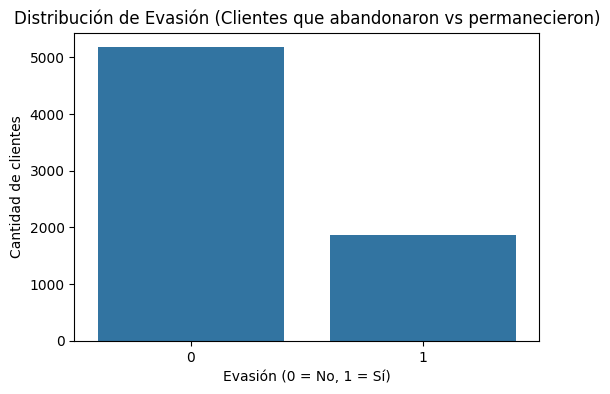

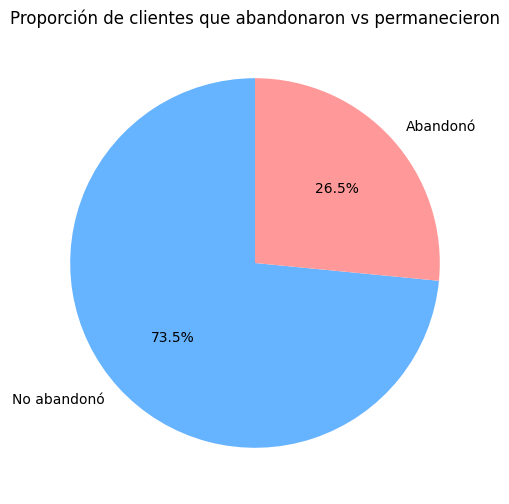

In [ ]:
# Conteo y porcentaje
conteo = telecomx['abandono'].value_counts()
porcentaje = telecomx['abandono'].value_counts(normalize=True) * 100

print("📊 Distribución de la variable EVASIÓN:\n")
print(pd.DataFrame({"Cantidad": conteo, "Porcentaje": porcentaje.round(2)}))

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.countplot(x='abandono', data=telecomx)
plt.title("Distribución de Evasión (Clientes que abandonaron vs permanecieron)")
plt.xlabel("Evasión (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de clientes")
plt.show()

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(conteo, labels=['No abandonó','Abandonó'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Proporción de clientes que abandonaron vs permanecieron")
plt.show()

### **Recuento de evasión por variables categóricas**


📌 Recuento de evasión por GENERO
abandono      0      1
genero                
Female    73.08  26.92
Male      73.84  26.16


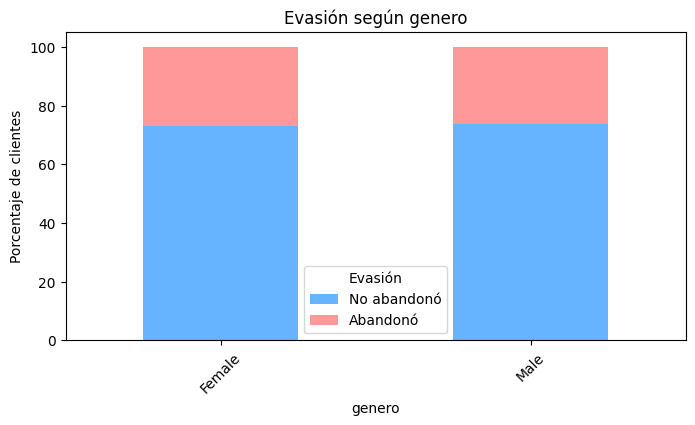


📌 Recuento de evasión por CONTRATO
abandono            0      1
contrato                    
Month to month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83


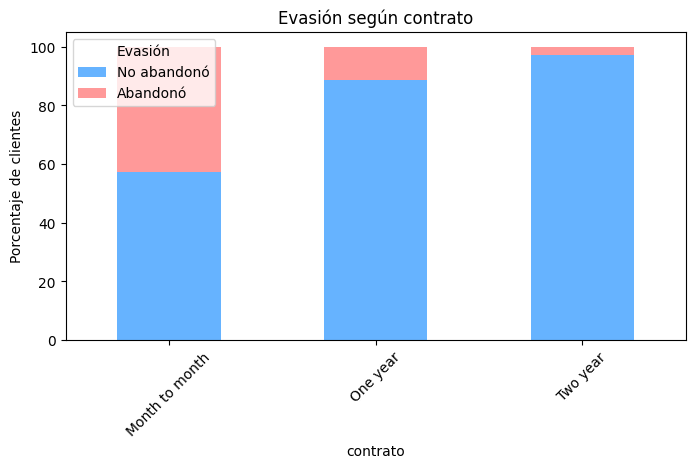


📌 Recuento de evasión por METODO_PAGO
abandono                       0      1
metodo_pago                            
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


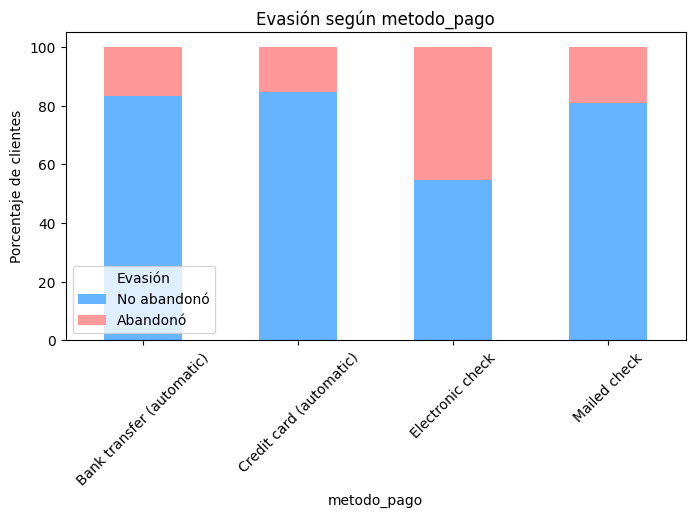


📌 Recuento de evasión por SERVICIO_INTERNET
abandono               0      1
servicio_internet              
0                  92.60   7.40
DSL                81.04  18.96
Fiber optic        58.11  41.89


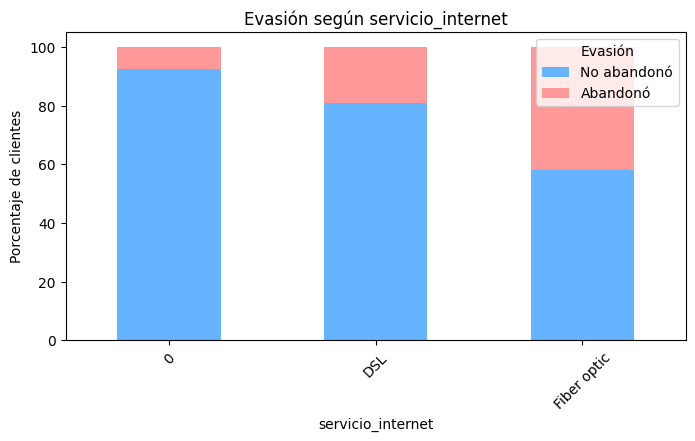


📌 Recuento de evasión por SERVICIO_TELEFONICO
abandono                 0      1
servicio_telefonico              
0                    75.07  24.93
1                    73.29  26.71


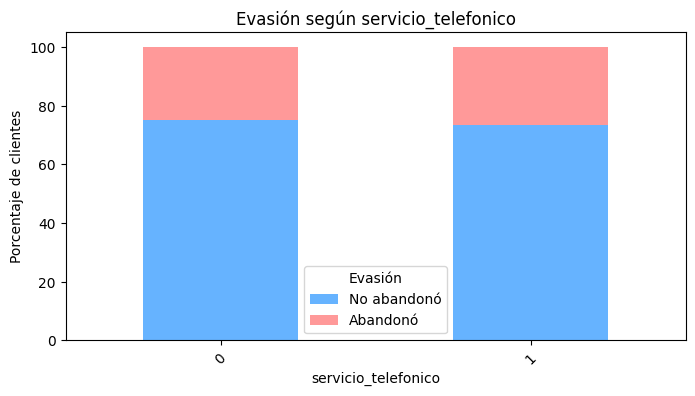

In [ ]:
# Lista automática de variables categóricas
categoricas = telecomx.select_dtypes(include='object').columns.tolist()

# Si quieres, puedes filtrar algunas columnas clave
columnas_clave = ['genero', 'contrato', 'metodo_pago', 'servicio_internet', 'servicio_telefonico']

for col in columnas_clave:
    print(f"\n📌 Recuento de evasión por {col.upper()}")
    tabla = pd.crosstab(telecomx[col], telecomx['abandono'], normalize='index') * 100
    tabla = tabla.round(2)
    print(tabla)

    # Gráfico de barras apiladas
    tabla.plot(kind='bar', stacked=True, figsize=(8,4), color=['#66b3ff','#ff9999'])
    plt.title(f"Evasión según {col}")
    plt.xlabel(col)
    plt.ylabel("Porcentaje de clientes")
    plt.legend(["No abandonó","Abandonó"], title="Evasión")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
print(telecomx['servicio_internet'].value_counts())


servicio_internet
Fiber optic    3096
DSL            2421
0              1526
Name: count, dtype: int64


Se detecto que se cuenta con una fila de 0 que se podria tomar como personas que no cuentan con internet por lo cual se manejo de esta manera:

In [ ]:
# Reemplazar '0' por "Sin servicio"
telecomx['servicio_internet'] = telecomx['servicio_internet'].replace(0, 'Sin servicio')

# Verificar cambios
print(telecomx['servicio_internet'].value_counts())

servicio_internet
Fiber optic     3096
DSL             2421
Sin servicio    1526
Name: count, dtype: int64


Se ejecuta nuevamente


📌 Recuento de evasión por GENERO
abandono      0      1
genero                
Female    73.08  26.92
Male      73.84  26.16


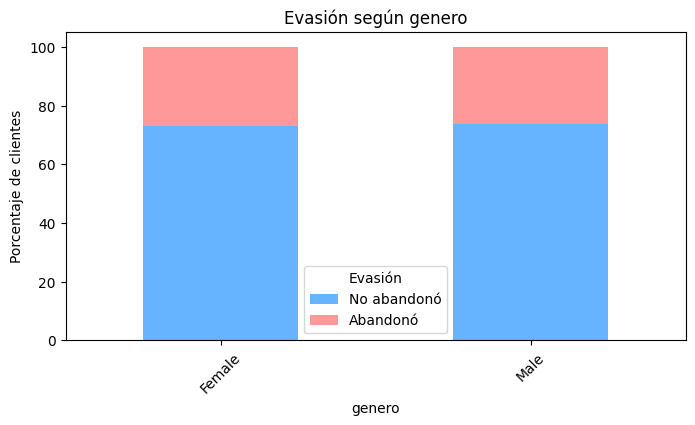


📌 Recuento de evasión por CONTRATO
abandono            0      1
contrato                    
Month to month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83


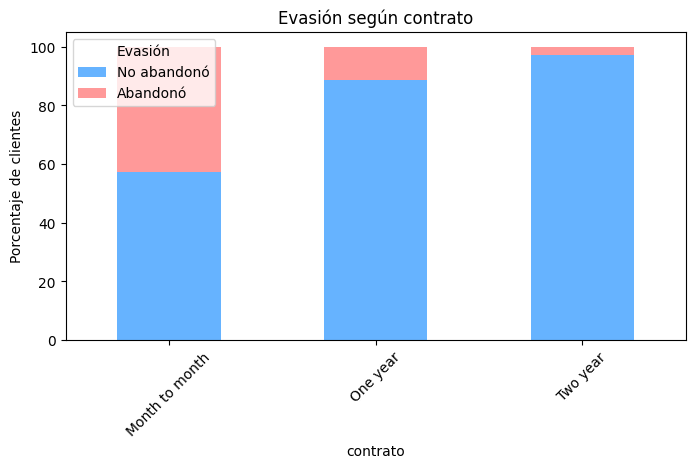


📌 Recuento de evasión por METODO_PAGO
abandono                       0      1
metodo_pago                            
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


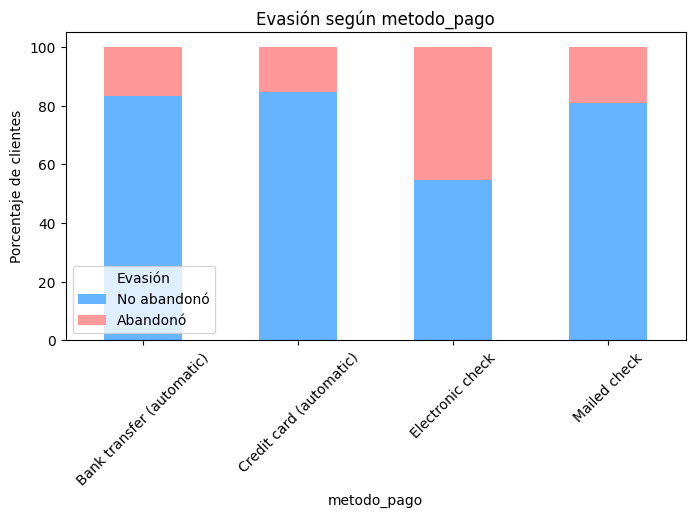


📌 Recuento de evasión por SERVICIO_INTERNET
abandono               0      1
servicio_internet              
DSL                81.04  18.96
Fiber optic        58.11  41.89
Sin servicio       92.60   7.40


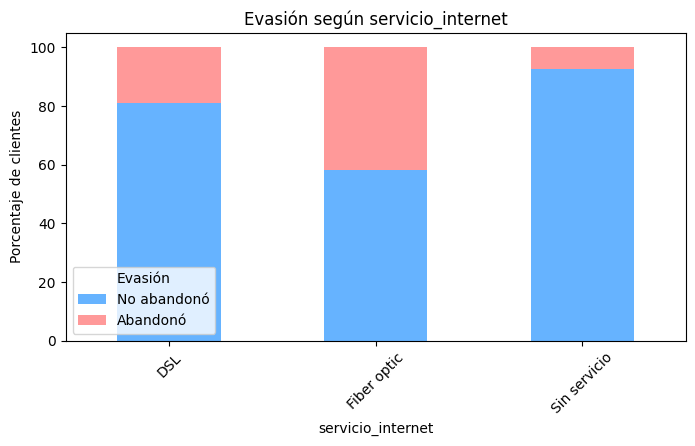


📌 Recuento de evasión por SERVICIO_TELEFONICO
abandono                 0      1
servicio_telefonico              
0                    75.07  24.93
1                    73.29  26.71


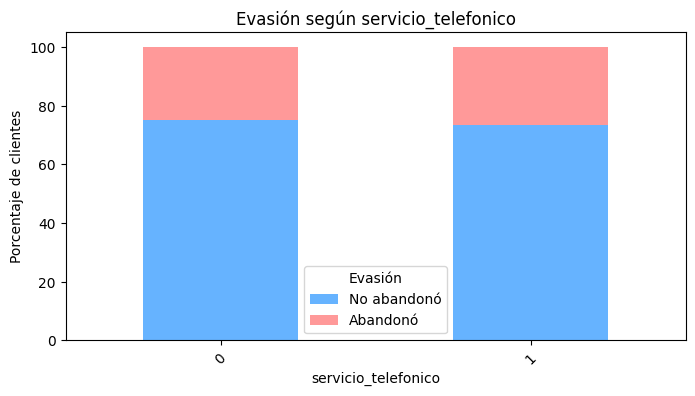

In [ ]:
# Lista automática de variables categóricas
categoricas = telecomx.select_dtypes(include='object').columns.tolist()

# Si quieres, puedes filtrar algunas columnas clave
columnas_clave = ['genero', 'contrato', 'metodo_pago', 'servicio_internet', 'servicio_telefonico']

for col in columnas_clave:
    print(f"\n📌 Recuento de evasión por {col.upper()}")
    tabla = pd.crosstab(telecomx[col], telecomx['abandono'], normalize='index') * 100
    tabla = tabla.round(2)
    print(tabla)

    # Gráfico de barras apiladas
    tabla.plot(kind='bar', stacked=True, figsize=(8,4), color=['#66b3ff','#ff9999'])
    plt.title(f"Evasión según {col}")
    plt.xlabel(col)
    plt.ylabel("Porcentaje de clientes")
    plt.legend(["No abandonó","Abandonó"], title="Evasión")
    plt.xticks(rotation=45)
    plt.show()


📌 Media de 'adulto_mayor' según evasión
abandono
0    0.13
1    0.25
Name: adulto_mayor, dtype: float64


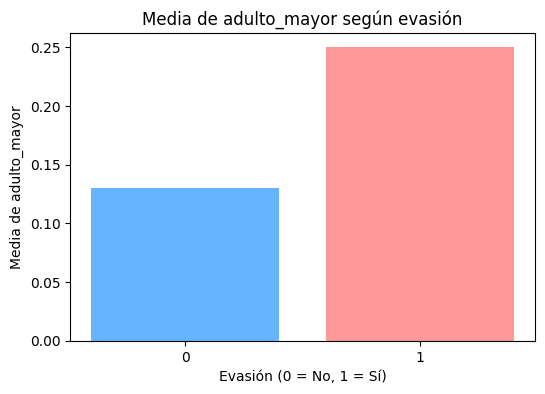


📌 Media de 'pareja' según evasión
abandono
0    0.53
1    0.36
Name: pareja, dtype: float64


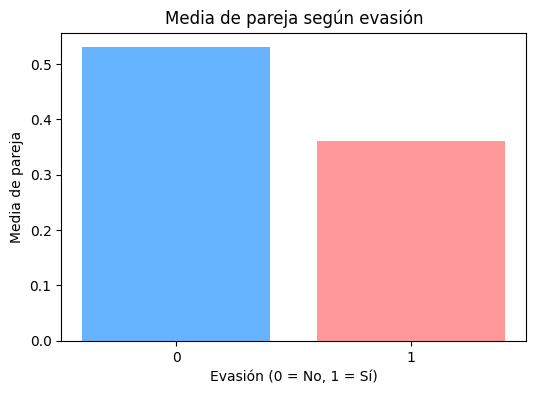


📌 Media de 'dependientes' según evasión
abandono
0    0.34
1    0.17
Name: dependientes, dtype: float64


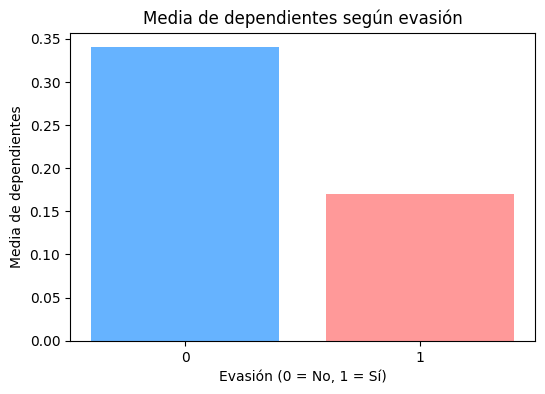


📌 Media de 'antiguedad_meses' según evasión
abandono
0    37.57
1    17.98
Name: antiguedad_meses, dtype: float64


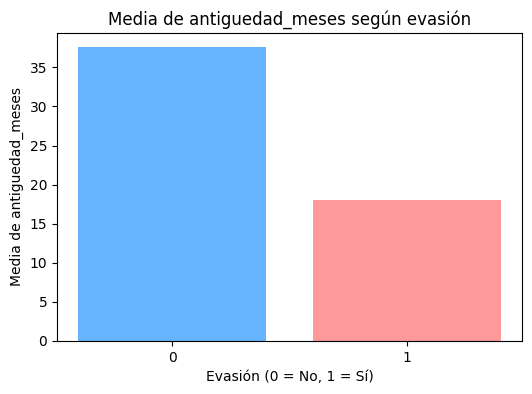


📌 Media de 'servicio_telefonico' según evasión
abandono
0    0.90
1    0.91
Name: servicio_telefonico, dtype: float64


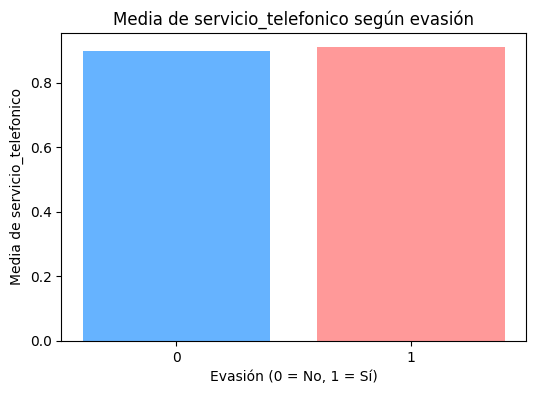


📌 Media de 'facturacion_electronica' según evasión
abandono
0    0.54
1    0.75
Name: facturacion_electronica, dtype: float64


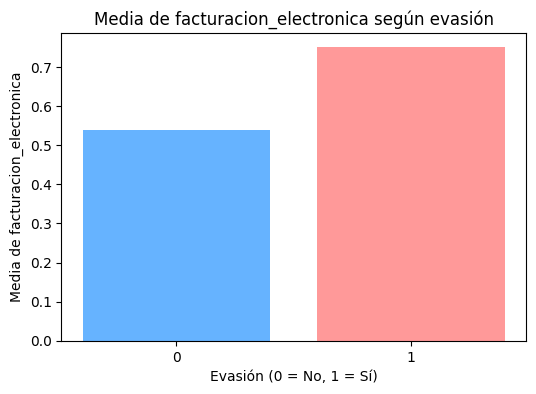


📌 Media de 'cargo_mensual' según evasión
abandono
0    61.27
1    74.44
Name: cargo_mensual, dtype: float64


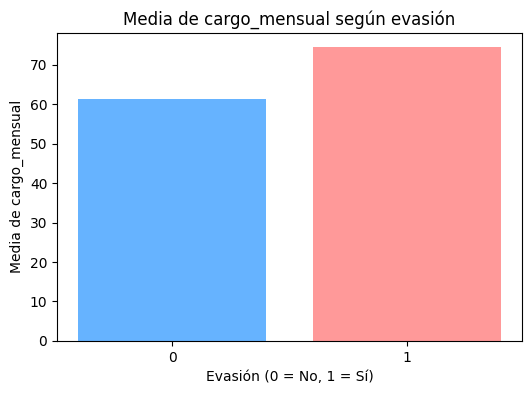


📌 Media de 'cargo_diario' según evasión
abandono
0    2.04
1    2.48
Name: cargo_diario, dtype: float64


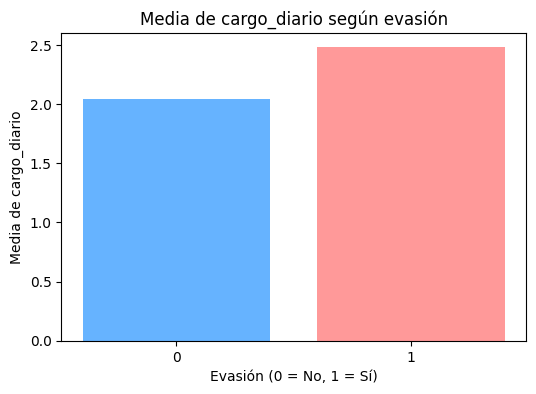

In [ ]:
# Seleccionamos columnas numéricas excepto 'abandono'
num_cols = telecomx.select_dtypes(include='number').columns.tolist()
num_cols = [col for col in num_cols if col != 'abandono']

for col in num_cols:
    print(f"\n📌 Media de '{col}' según evasión")

    # Media por grupo de evasión
    resumen = telecomx.groupby('abandono')[col].mean().round(2)
    print(resumen)

    # Gráfico de barras usando matplotlib
    plt.figure(figsize=(6,4))
    plt.bar(resumen.index.astype(str), resumen.values, color=['#66b3ff','#ff9999'])
    plt.title(f"Media de {col} según evasión")
    plt.xlabel("Evasión (0 = No, 1 = Sí)")
    plt.ylabel(f"Media de {col}")
    plt.show()


#📄Informe final

# 📊 Informe Final: Análisis de Evasión de Clientes (Churn) - TelecomX

---

## 🔹 Introducción
El objetivo de este análisis es **comprender el comportamiento de los clientes de TelecomX** y **identificar factores que influyen en la evasión** (Churn).  
El churn representa a los clientes que han cancelado su servicio, lo que impacta directamente en los ingresos y crecimiento de la empresa. Analizar patrones de evasión permite tomar decisiones estratégicas para **retener clientes** y mejorar la satisfacción.

---

## 🔹 Limpieza y Tratamiento de Datos
1. Se importó el dataset original de TelecomX.  
2. Se tradujeron las columnas al español para facilitar el análisis.  
3. Se convirtieron las variables categóricas relevantes:  
   - `abandono` (Churn) → `0` = No abandonó, `1` = Abandonó  
4. Se corrigieron valores inconsistentes, por ejemplo:  
   - `'0'` o `0` en `servicio_internet` → `"Sin servicio"`  
5. Se verificó la presencia de valores nulos y duplicados, eliminando o ajustando según fuera necesario.  

---

## 🔹 Análisis Exploratorio de Datos

### 1️⃣ Distribución General de la Evasión
- **Tabla de proporciones y conteo de clientes que abandonaron vs permanecieron:**  
  *(Aquí insertar la tabla generada con `telecomx['abandono'].value_counts()`)*  

- **Visualización de la proporción de evasión:**  
  *(Gráficos de barras y pastel que creaste)*  

### 2️⃣ Evasión según Variables Categóricas
- Se analizaron variables como `genero`, `contrato`, `metodo_pago`, `servicio_internet` y `servicio_telefonico`.  
- Se identificaron patrones relevantes, por ejemplo:  
  - Clientes con **contrato mensual** presentan mayor tasa de abandono que los contratos anuales.  
  - Usuarios con **Fiber optic** tienen más tendencia a cancelar que los que tienen DSL o sin servicio de internet.  
- **Gráficas de barras apiladas y tablas de porcentaje** muestran claramente estas diferencias.  

### 3️⃣ Evasión según Variables Numéricas
- Variables como `cargo_total`, `cargo_mensual` y `antiguedad_meses` fueron comparadas entre clientes que abandonaron y los que permanecieron.  
- Hallazgos principales:  
  - Clientes con **menor antigüedad** y menor tiempo de contrato tienen más probabilidad de abandono.  
  - Clientes con **cargos totales más altos** también presentan tendencia a cancelar.  
- **Gráficos de barras por media de cada variable** facilitan la visualización de estas diferencias.  

---

## 🔹 Conclusiones e Insights
1. La mayoría de los clientes permanecen en el servicio, pero un **porcentaje significativo abandona**, principalmente aquellos con contratos más cortos y servicios específicos como Fiber optic.  
2. La **antigüedad del cliente y el tipo de contrato** son factores determinantes en la evasión.  
3. Algunos métodos de pago y servicios adicionales también muestran correlación con abandono, lo que puede orientar acciones de retención.  

---

## 🔹 Recomendaciones Estratégicas
1. **Ofrecer incentivos** o beneficios a clientes con contratos cortos para reducir la evasión temprana.  
2. Revisar la **calidad de servicios de internet** (ej. Fiber optic) para disminuir insatisfacción.  
3. **Programas de fidelización** dirigidos a clientes con alto cargo mensual o total.  
4. Monitorear periódicamente la evasión según **perfil de cliente** y ajustar campañas de retención.  

---
